In [15]:
# Generated in 4_Train_Score_split
#run = "train_df" 
#score = "score_df"

run = "before_selection" 

## Igel

This notebook implements `Igel`

> Igel supports all sklearn's machine learning functionality, whether regression, classification or clustering. Precisely, you can use 63 different machine learning model in igel.

Igel's supported models:

        +--------------------+----------------------------+-------------------------+
        |      regression    |        classification      |        clustering       |
        +--------------------+----------------------------+-------------------------+
        |   LinearRegression |         LogisticRegression |                  KMeans |
        |              Lasso |                      Ridge |     AffinityPropagation |
        |          LassoLars |               DecisionTree |                   Birch |
        | BayesianRegression |                  ExtraTree | AgglomerativeClustering |
        |    HuberRegression |               RandomForest |    FeatureAgglomeration |
        |              Ridge |                 ExtraTrees |                  DBSCAN |
        |  PoissonRegression |                        SVM |         MiniBatchKMeans |
        |      ARDRegression |                  LinearSVM |    SpectralBiclustering |
        |  TweedieRegression |                      NuSVM |    SpectralCoclustering |
        | TheilSenRegression |            NearestNeighbor |      SpectralClustering |
        |    GammaRegression |              NeuralNetwork |               MeanShift |
        |   RANSACRegression | PassiveAgressiveClassifier |                  OPTICS |
        |       DecisionTree |                 Perceptron |                    ---- |
        |          ExtraTree |               BernoulliRBM |                    ---- |
        |       RandomForest |           BoltzmannMachine |                    ---- |
        |         ExtraTrees |       CalibratedClassifier |                    ---- |
        |                SVM |                   Adaboost |                    ---- |
        |          LinearSVM |                    Bagging |                    ---- |
        |              NuSVM |           GradientBoosting |                    ---- |
        |    NearestNeighbor |        BernoulliNaiveBayes |                    ---- |
        |      NeuralNetwork |      CategoricalNaiveBayes |                    ---- |
        |         ElasticNet |       ComplementNaiveBayes |                    ---- |
        |       BernoulliRBM |         GaussianNaiveBayes |                    ---- |
        |   BoltzmannMachine |      MultinomialNaiveBayes |                    ---- |
        |           Adaboost |                       ---- |                    ---- |
        |            Bagging |                       ---- |                    ---- |
        |   GradientBoosting |                       ---- |                    ---- |
        +--------------------+----------------------------+-------------------------+

In [20]:
#Fit
algo_fit = 'yaml/cluster.yaml'

# Evaluate
algo_eval = 'yaml/cluster.yaml'

# Predict
algo_predict = 'yaml/hyper.yaml'   # hyper, forest

# Options [cluster, hyper, iris, regres, forest]

In [21]:
import pandas as pd
import seaborn as sns
from igel import Igel

# Algorithm selection


- [cluster,cluster,cluster] working
- [cluster,hyper,hyper] working
- `['forest'->`hyper`->`hyper`]

In [22]:
# Import
df = pd.read_csv(run + ".csv")

# Timestamp will need to be reconfigured as index on each load
#df = df.set_index('timestamp')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
   
#df = df.replace(r'\D+', '', regex=True)
df

,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,1.155485e+18,20,660,150,990,180,420,0,11109999656677246,11109999656677246,11109999656677246
1,1.155487e+18,10,390,520,2570,77090,28140,3920,0,0,0
2,1.155488e+18,20,630,170,980,5370,14860,200,0,0,0
3,1.155494e+18,40,570,630,2570,2950,21450,20,100,11109999656677246,10529999732971191
4,1.155495e+18,150,420,400,2170,16820,1040,510,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2944,1.158759e+18,30,650,80,570,5500,7200,70,14289999961853027,11109999656677246,125
2945,1.158759e+18,70,470,150,800,1060,1240,0,22219999313354492,22219999313354492,22219999313354492
2946,1.158760e+18,50,370,120,570,2200,610,30,3333000183105469,22219999313354492,26670000076293945
2947,1.158762e+18,90,280,80,700,330,0,40,16670000076293945,11109999656677246,13329999923706055


## Fit

In [23]:


# provide the arguments in a dictionary
params = {
        'cmd': 'fit',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': run + ".csv",
        'yaml_path': algo_fit
}

Igel(**params)


INFO - Entered CLI args: {'cmd': 'fit', 'data_path': 'before_selection.csv', 'yaml_path': 'yaml/cluster.yaml'}
INFO - Executing command: fit ...
INFO - reading data from before_selection.csv
INFO - You passed the configurations as a yaml file.
INFO - your chosen configuration: {'dataset': {'type': 'csv'}, 'model': {'type': 'clustering', 'algorithm': 'KMeans', 'arguments': {'n_clusters': 22, 'init': 'random', 'n_init': 10, 'max_iter': 300, 'tol': 0.0004, 'random_state': 0}}, 'target': None}
INFO - dataset_props: {'type': 'csv'} 
model_props: {'type': 'clustering', 'algorithm': 'KMeans', 'arguments': {'n_clusters': 22, 'init': 'random', 'n_init': 10, 'max_iter': 300, 'tol': 0.0004, 'random_state': 0}} 
 target: None 

INFO - dataset shape: (2949, 12)
INFO - dataset attributes: ['Unnamed: 0', 'tweet_id', 'positive_sentiment', 'negative_sentiment', 'numb_of_questions', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_list_count', 'dict_precision', 'dict_recall', 'dict_f_meas

In [24]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'evaluate',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': run + ".csv",
        'yaml_path': algo_eval
}

Igel(**params)

INFO - Entered CLI args: {'cmd': 'evaluate', 'data_path': 'before_selection.csv', 'yaml_path': 'yaml/cluster.yaml'}
INFO - Executing command: evaluate ...
INFO - reading data from before_selection.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - result path: /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results 
INFO - loading model form /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav 
INFO - dataset shape: (2949, 12)
INFO - dataset attributes: ['Unnamed: 0', 'tweet_id', 'positive_sentiment', 'negative_sentiment', 'numb_of_questions', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_list_count', 'dict_precision', 'dict_recall', 'dict_f_measure']
INFO - saving fit description to /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/evaluation.json


In [25]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'predict',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': score + ".csv",
        'yaml_path': algo_predict
}

Igel(**params)



INFO - Entered CLI args: {'cmd': 'predict', 'data_path': 'score_df.csv', 'yaml_path': 'yaml/hyper.yaml'}
INFO - Executing command: predict ...
INFO - reading data from score_df.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - loading from /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - dataset shape: (2949, 14)
INFO - dataset attributes: ['Unnamed: 0', 'tweet_id', 'priority', 'postCategories_x', 'positive_sentiment', 'negative_sentiment', 'numb_of_questions', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_list_count', 'dict_precision', 'dict_recall', 'dict_f_measure']
ERROR - Error while preparing predictions: Input contains NaN, infinity or a value too large for dtype('float64').
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/igel/igel.py", line 485, in predict
    y_pred = model.predict(x_val)
  File "/op

In [26]:
# Predictions

In [27]:
res = pd.read_csv("model_results/predictions.csv")
#res.reset_index()
res



,result
0,5
1,5
2,5
3,5
4,5
...,...
2944,5
2945,5
2946,5
2947,5


In [28]:
second_source = pd.read_csv("score_df.csv")
second_source = df.loc[:, ~df.columns.str.contains('^Unnamed')]

second_source

,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,1.155485e+18,20,660,150,990,180,420,0,11109999656677246,11109999656677246,11109999656677246
1,1.155487e+18,10,390,520,2570,77090,28140,3920,0,0,0
2,1.155488e+18,20,630,170,980,5370,14860,200,0,0,0
3,1.155494e+18,40,570,630,2570,2950,21450,20,100,11109999656677246,10529999732971191
4,1.155495e+18,150,420,400,2170,16820,1040,510,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2944,1.158759e+18,30,650,80,570,5500,7200,70,14289999961853027,11109999656677246,125
2945,1.158759e+18,70,470,150,800,1060,1240,0,22219999313354492,22219999313354492,22219999313354492
2946,1.158760e+18,50,370,120,570,2200,610,30,3333000183105469,22219999313354492,26670000076293945
2947,1.158762e+18,90,280,80,700,330,0,40,16670000076293945,11109999656677246,13329999923706055


In [29]:
mergedDf = second_source.merge(res, left_index=True, right_index=True)
mergedDf

,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
0,1.155485e+18,20,660,150,990,180,420,0,11109999656677246,11109999656677246,11109999656677246,5
1,1.155487e+18,10,390,520,2570,77090,28140,3920,0,0,0,5
2,1.155488e+18,20,630,170,980,5370,14860,200,0,0,0,5
3,1.155494e+18,40,570,630,2570,2950,21450,20,100,11109999656677246,10529999732971191,5
4,1.155495e+18,150,420,400,2170,16820,1040,510,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2944,1.158759e+18,30,650,80,570,5500,7200,70,14289999961853027,11109999656677246,125,5
2945,1.158759e+18,70,470,150,800,1060,1240,0,22219999313354492,22219999313354492,22219999313354492,5
2946,1.158760e+18,50,370,120,570,2200,610,30,3333000183105469,22219999313354492,26670000076293945,5
2947,1.158762e+18,90,280,80,700,330,0,40,16670000076293945,11109999656677246,13329999923706055,5


In [30]:
mergedDf.to_csv("results_merged.csv", index=False)
df = pd.read_csv("results_merged.csv")
df

,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
0,1.155485e+18,20,660,150,990,180,420,0,11109999656677246,11109999656677246,11109999656677246,5
1,1.155487e+18,10,390,520,2570,77090,28140,3920,0,0,0,5
2,1.155488e+18,20,630,170,980,5370,14860,200,0,0,0,5
3,1.155494e+18,40,570,630,2570,2950,21450,20,100,11109999656677246,10529999732971191,5
4,1.155495e+18,150,420,400,2170,16820,1040,510,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2944,1.158759e+18,30,650,80,570,5500,7200,70,14289999961853027,11109999656677246,125,5
2945,1.158759e+18,70,470,150,800,1060,1240,0,22219999313354492,22219999313354492,22219999313354492,5
2946,1.158760e+18,50,370,120,570,2200,610,30,3333000183105469,22219999313354492,26670000076293945,5
2947,1.158762e+18,90,280,80,700,330,0,40,16670000076293945,11109999656677246,13329999923706055,5


In [31]:
#df = df.sort_values(by=['result'])
df

,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
0,1.155485e+18,20,660,150,990,180,420,0,11109999656677246,11109999656677246,11109999656677246,5
1,1.155487e+18,10,390,520,2570,77090,28140,3920,0,0,0,5
2,1.155488e+18,20,630,170,980,5370,14860,200,0,0,0,5
3,1.155494e+18,40,570,630,2570,2950,21450,20,100,11109999656677246,10529999732971191,5
4,1.155495e+18,150,420,400,2170,16820,1040,510,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2944,1.158759e+18,30,650,80,570,5500,7200,70,14289999961853027,11109999656677246,125,5
2945,1.158759e+18,70,470,150,800,1060,1240,0,22219999313354492,22219999313354492,22219999313354492,5
2946,1.158760e+18,50,370,120,570,2200,610,30,3333000183105469,22219999313354492,26670000076293945,5
2947,1.158762e+18,90,280,80,700,330,0,40,16670000076293945,11109999656677246,13329999923706055,5


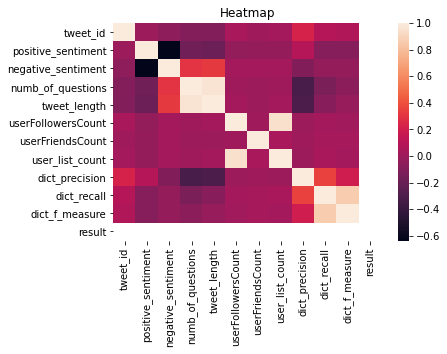

In [32]:
import matplotlib.pyplot as plt


sns.heatmap(df.corr())
plt.title('Heatmap')
plt.savefig('heatmap.png')

In [33]:
df.loc[df['result'] == 5]



INFO - NumExpr defaulting to 4 threads.


,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
0,1.155485e+18,20,660,150,990,180,420,0,11109999656677246,11109999656677246,11109999656677246,5
1,1.155487e+18,10,390,520,2570,77090,28140,3920,0,0,0,5
2,1.155488e+18,20,630,170,980,5370,14860,200,0,0,0,5
3,1.155494e+18,40,570,630,2570,2950,21450,20,100,11109999656677246,10529999732971191,5
4,1.155495e+18,150,420,400,2170,16820,1040,510,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2944,1.158759e+18,30,650,80,570,5500,7200,70,14289999961853027,11109999656677246,125,5
2945,1.158759e+18,70,470,150,800,1060,1240,0,22219999313354492,22219999313354492,22219999313354492,5
2946,1.158760e+18,50,370,120,570,2200,610,30,3333000183105469,22219999313354492,26670000076293945,5
2947,1.158762e+18,90,280,80,700,330,0,40,16670000076293945,11109999656677246,13329999923706055,5


In [34]:
df.describe()

,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,result
count,2.949000e+03,2949.000000,2949.000000,2949.000000,2949.000000,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2.949000e+03,2949.0
mean,1.157191e+18,81.095287,464.760936,228.307901,1172.143099,1.841042e+06,2.788026e+04,1.033596e+04,2.305359e+15,6.849848e+15,6.035584e+15,5.0
std,7.478400e+14,95.349394,170.405133,148.670791,694.088055,1.993755e+07,1.024762e+05,8.221478e+04,5.384528e+15,7.136414e+15,7.216410e+15,0.0
min,1.155485e+18,0.000000,0.000000,20.000000,70.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.0
25%,1.156740e+18,30.000000,360.000000,110.000000,640.000000,1.490000e+03,1.690000e+03,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.0
50%,1.157028e+18,50.000000,510.000000,170.000000,880.000000,8.500000e+03,7.160000e+03,1.800000e+02,1.000000e+02,1.111000e+16,1.250000e+02,5.0
75%,1.157648e+18,100.000000,600.000000,330.000000,1640.000000,4.044000e+04,2.231000e+04,1.280000e+03,1.250000e+02,1.111000e+16,1.053000e+16,5.0
max,1.158763e+18,870.000000,800.000000,950.000000,2870.000000,4.384682e+08,2.369100e+06,2.002190e+06,2.222000e+16,2.222000e+16,3.529000e+16,5.0
